In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statistics import mean
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/sanyagilhotra/Desktop/NN from scratch/clean_weather.csv", index_col=0)
data = data.ffill()

In [2]:
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [3]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

def mse_grad(actual, predicted):
    return (predicted - actual)

In [4]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i-1], inputs[i]) / 5 - 0.2,
            np.ones((1,inputs[i]))
        ])
    return layers

In [5]:
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        hidden.append(batch.copy())

    return batch, hidden

In [6]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

        grad = grad.T
        w_grad = np.matmul(grad, hidden[i]).T
        b_grad = np.mean(grad.T, axis=0)

        layers[i][0] -= (w_grad + layers[i][0] * .01) * lr
        layers[i][1] -= b_grad * lr
        grad = np.matmul(layers[i][0], grad).T
    return layers

Epoch: 0 Train MSE: 4202.049885583284
Epoch: 50 Train MSE: 22.04418588542435
Epoch: 100 Train MSE: 22.03063618281539
Epoch: 150 Train MSE: 22.02428924687209
Epoch: 200 Train MSE: 22.020063252547548
Epoch: 250 Train MSE: 22.013098241294504
Epoch: 300 Train MSE: 22.009811205147493
Epoch: 350 Train MSE: 22.008069512180782
Epoch: 400 Train MSE: 22.006311401648013
Epoch: 450 Train MSE: 22.00482923840685
Epoch: 500 Train MSE: 22.003463431689052
Epoch: 550 Train MSE: 22.002240684554515
Epoch: 600 Train MSE: 22.0007073732071
Epoch: 650 Train MSE: 21.99950750355277
Epoch: 700 Train MSE: 21.998511091157546
Epoch: 750 Train MSE: 21.99762062344904
Epoch: 800 Train MSE: 21.996663011859255
Epoch: 850 Train MSE: 21.99588851906184
Epoch: 900 Train MSE: 21.995091482768334
Epoch: 950 Train MSE: 21.994417478903184


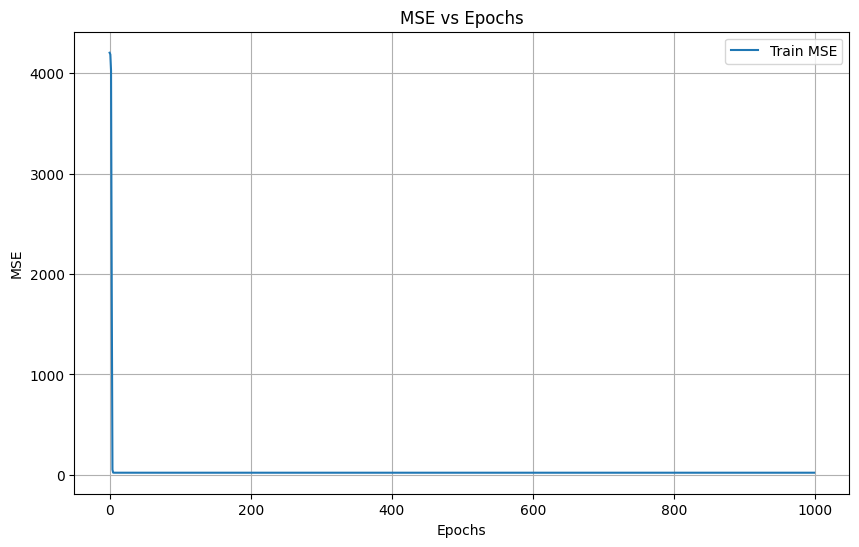

In [7]:
layer_conf = [3,10,10,1]
lr = 1e-6
epochs=1000
batch_size = 8
train_losses=[]
valid_losses=[]
layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(mse(y_batch,pred))

        layers = backward(layers, hidden, loss, lr)

    train_losses.append(np.mean(epoch_loss))
    if(epoch%50==0):
        print(f"Epoch: {epoch} Train MSE: {train_losses[epoch]}")
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Train MSE')
plt.title('MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()